<a href="https://www.kaggle.com/code/shraddhavats/hr-analytics-eda-classification?scriptVersionId=141258615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.display import Image, display
import os
!ls ../input/

hr-analytics-job  hr-analytics-job-change-of-data-scientists


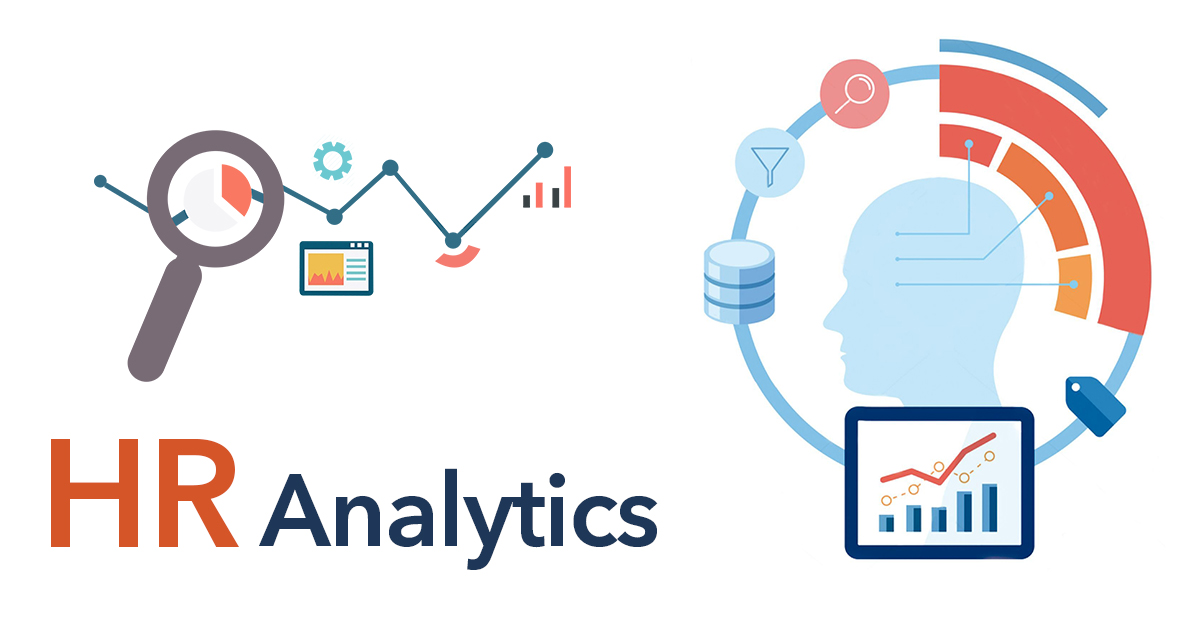

In [2]:
img=Image('/kaggle/input/hr-analytics-job/HR-Analytics.jpg')
img

#  <span style="background-color:pink; font-weight:bold">Problem Statement-</span>

A company operating in the field of Big Data and Data Science wants to hire data scientists from people who have successfully passed some of the courses the company is running. Many people sign up for their training. The company wants to know which of these candidates really want to work for the company after the training, as this helps in cost and time as well as the quality of training or the planning of courses and the classification of candidates.

This dataset is designed to understand the factors that cause a person to want to work for the company. The goal of this project is to build a model that uses existing credentials, demographics, and experience to predict a candidate's likelihood of working for the company.
Data

**The dataset contains the following features:**

* enrollee_id: A unique identifier for each candidate.
* city: City code where the candidate is located.
* city_development_index: A city's development index, scaled for comparison.
* gender: The gender of the candidate.
* relevent_experience: Whether the candidate possesses relevant work experience.
* enrolled_university: The type of university course the candidate is enrolled in.
* education_level: The candidate's educational attainment.
* major_discipline: The candidate's major discipline in education.
* experience: The candidate's total years of work experience.
* company_size: The number of employees in the candidate's current employer's company.
* company_type: The type of the candidate's current employer.
* last_new_job: The difference in years between the candidate's previous job and the current job.
* training_hours: The number of training hours the candidate has completed.

**The target variable, target, is binary:**

* 0: Indicates that the candidate is not actively seeking a job change.
* 1: Indicates that the candidate is considering a job change.

**We have main keys points to note in this dataset:**

* Most of the data is categorical
* There is an imbalance in the classes
* There are lots of missing values

The primary goal is to build predictive models that can accurately predict a candidate's job change intention based on the provided features. Furthermore, we seek to interpret the influence of different features on a candidate's decision to stay or leave, providing actionable insights that will aid in decision-making.

#  <span style="background-color:pink; font-weight:bold">Hypothesis Generation-</span>

Here are some hypotheses you can generate based on the provided dataset:
1. **Relevant Experience Hypothesis:** Candidates with relevant work experience are more likely to stay with the company after training.Previous experience might indicate a stronger commitment to the field and a higher likelihood of staying in a related job.
2. **Education Level Hypothesis:** Candidates with higher education levels are more likely to remain with the company.Higher education could signify a greater investment in their career, making candidates less likely to switch jobs.
3. **Training Hours Hypothesis:** Candidates who invest more time in training hours are more likely to stay with the company.Higher training hours could indicate greater enthusiasm and dedication to the field, increasing the chances of job retention.
4. **Company Type Hypothesis:** Candidates working in certain company types (e.g., startups, established corporations) are more likely to seek job changes.The nature and culture of the current employer might influence a candidate's inclination to explore new opportunities.
5. **Development Index Hypothesis:** Candidates in cities with higher development indices are more likely to stay. Cities with better development indices might offer a more favorable job market, reducing the need to look for new opportunities.
6. **Gender Hypothesis:** Gender might play a role in job change intentions.Societal factors and career aspirations might influence how gender impacts a candidate's job decisions.
7. **Experience and Last New Job Hypothesis:** Candidates with longer experience in their current job and a longer gap between their last job change are less likely to switch.Longer job tenures and gaps between job changes might indicate stability and commitment.
8. **Enrolled University Hypothesis:** Candidates enrolled in full-time university courses are less likely to change jobs.Full-time enrollment might suggest a focus on education, reducing the inclination to explore new job options.
9. **Major Discipline Hypothesis**: Candidates with certain major disciplines (e.g., Computer Science) are more likely to seek job changes.Different major disciplines could lead to varied job opportunities and preferences.
10. **Company Size Hypothesis:** Candidates working in companies with a specific size (e.g., small, large) are more prone to changing jobs.Company size might influence factors such as growth potential and work environment, affecting job decisions.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv
/kaggle/input/hr-analytics-job/HR-Analytics.jpg


#  <span style="background-color:pink; font-weight:bold">Getting the system ready and loading the data-</span>

In [4]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv(r'/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv')
df_test=pd.read_csv(r'/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
df_train=pd.read_csv(r'/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')


#  <span style="background-color:pink; font-weight:bold">Understanding the data-</span>

In [6]:
ts_c=df_test.copy()
tr_c=df_train.copy()
tr_c

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
#columns of train data-
tr_c.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
#columns of test data-
ts_c.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

**Observation-**
* We have similar features in test dataset except the target column. We will predit the target using the model built using the train data.


In [9]:
#Data types for each variable-
tr_c.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

**Observation-**

* there are two int columns (enrollee_id and training_hours) and two float columns (city_development_index and target)
* the remaining 10 columns are of object type

In [10]:
#Shape of Dataset-
tr_c.shape, ts_c.shape

((19158, 14), (2129, 13))

**Observation-**
* there are 19157 rows and 14 columns in the dataset-

#  <span style="background-color:pink; font-weight:bold">Exploratory Data Analysis (Univariate Analysis)-</span>

In [11]:
tr_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**Observation-**
* there are 19157 rows and 14 columns in the dataset-
* the columns: gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job have nulls in them
* there are two int columns (enrollee_id and training_hours) and two float columns (city_development_index and target)
* the remaining 10 columns are of object type

In [12]:
tr_c.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [13]:
df_train.isnull().mean().sort_values(ascending=False)*100

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
education_level            2.401086
last_new_job               2.207955
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
dtype: float64

**Observations-**
* gender has 23.53% missing values
* major_discipline has 14.68 missing values
* company_size has 30.99% missing values
* company_type has 32.05% missing values

In [14]:
df_train[df_train.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


**Observations:**
* There are no duplicate records into the dataset

**Target Variable-**

In [15]:
tr_c['target'].value_counts(dropna=False)

0.0    14381
1.0     4777
Name: target, dtype: int64

In [16]:
tr_c['target'].value_counts(normalize=True)*100

0.0    75.065247
1.0    24.934753
Name: target, dtype: float64

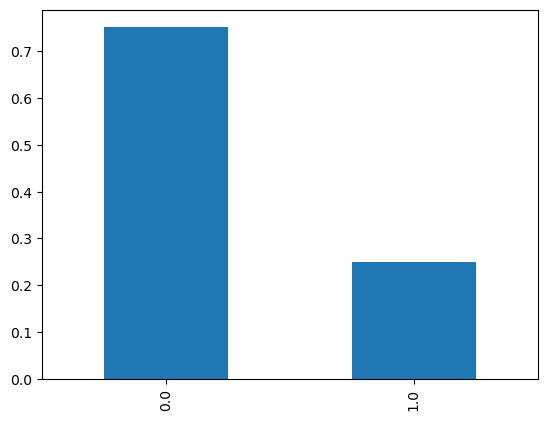

In [17]:
tr_c['target'].value_counts(normalize=True).plot.bar();

**Observation-**
* From total numbers of employees, 25% are looking for job change 
* 75% are not looking for job change

<span style="background-color:yellow; font-weight:bold">1. **Independent Variable(Categorical)-**</span>

**(Ordinal)**

In [18]:
tr_c['enrolled_university'].value_counts(normalize=True, dropna=False)

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
NaN                 0.020148
Name: enrolled_university, dtype: float64

**Observations-**
* 72.12% of the employees did not enroll on any course
* 19.61% of the employees enrolled to the full time course
* 6.25% of the employees enrolles to the part-time course
* 2.01% of the values are null for this column

In [19]:
tr_c['relevent_experience'].value_counts(normalize=True, dropna=False)

Has relevent experience    0.719908
No relevent experience     0.280092
Name: relevent_experience, dtype: float64

**Observations-**
* 71.99% of the empoyees have relevant experience
* 28.01% of the employees don't have any relevant experience

In [20]:
tr_c['education_level'].value_counts(normalize=True, dropna=False)

Graduate          0.605387
Masters           0.227633
High School       0.105282
NaN               0.024011
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64

**Observation-**
* 60.54% of the employees are graduates, 22.76% have a master's degree and 10.53% have high school diploma
* 2.16% of the employees have a Phd while 1.60% have only primary school education
* 2.4% of the values from this column are null

In [21]:
tr_c['experience'].value_counts(normalize=True, dropna=False)

>20    0.171521
5      0.074642
4      0.073233
3      0.070675
6      0.063472
2      0.058827
7      0.053659
10     0.051415
9      0.051154
8      0.041862
15     0.035807
11     0.034659
14     0.030588
1      0.028656
<1     0.027247
16     0.026516
12     0.025786
13     0.020827
17     0.017852
19     0.015868
18     0.014615
20     0.007725
NaN    0.003393
Name: experience, dtype: float64

**Observations-**
* 17.15% of the employees have more than 20 years experience

In [22]:
tr_c['company_size'].value_counts(normalize=True, dropna=False)

NaN          0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64

**Observations-** 
* 30.99% of the values from this column are null
* 16.09% of the employees come from the companies with 50-99 employees
* 13.41% of the employees come from companies with 100-500 employees
* 10.54% of the employees come from companies with 10000+ employees

In [23]:
tr_c['last_new_job'].value_counts(normalize=True, dropna=False)

1        0.419668
>4       0.171730
2        0.151373
never    0.127988
4        0.053711
3        0.053450
NaN      0.022080
Name: last_new_job, dtype: float64

**Observations-**
* 41.97% of the employees changed their job one year ago
* 27.17% of the employess changed their job more than 4 years ago
* 15.14% of the employees changed their job two years ago

In [24]:
tr_c['city'].value_counts(normalize=True)

city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_129    0.000157
city_111    0.000157
city_121    0.000157
city_140    0.000052
city_171    0.000052
Name: city, Length: 123, dtype: float64

**Observations-**
* city_103 is the most frequent one with 22.73% occurences
* city_21 is the second frequent one with 14.10% frequency in the dataset
* city_16 is the third frequent one with 8% occurences in the dataset

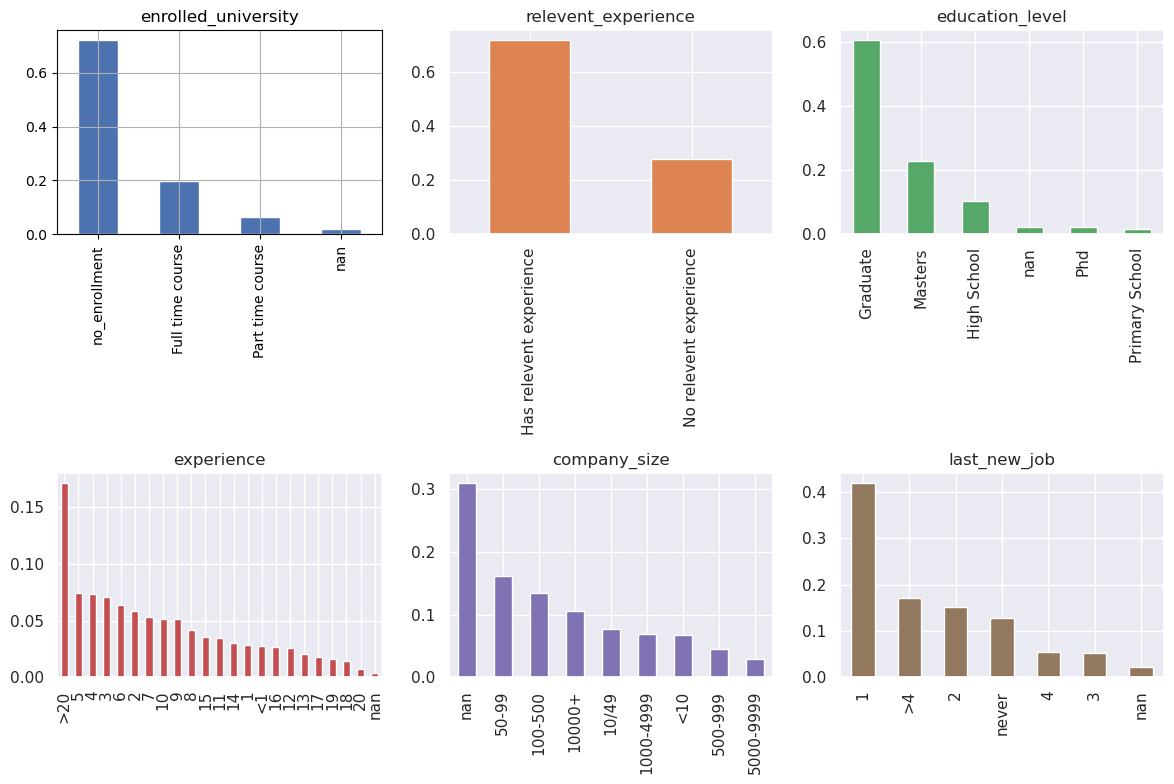

In [25]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(231)
sns.set_theme(style="darkgrid")
tr_c['enrolled_university'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12, 8), title='enrolled_university', color='C0');

plt.subplot(232)
tr_c['relevent_experience'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12, 8), title='relevent_experience', color='C1');

plt.subplot(233)
tr_c['education_level'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12, 8), title='education_level', color='C2');

plt.subplot(234)
tr_c['experience'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12,8), title='experience', color='C3');

plt.subplot(235)
tr_c['company_size'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12, 8), title='company_size', color='C4');

plt.subplot(236)
tr_c['last_new_job'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(12, 8), title='last_new_job', color='C5');

plt.tight_layout()


<span style="background-color:pink; font-weight:bold">1. **(For train)-**</span>

**Company_size-**

In [26]:
tr_c['company_size'].replace('10000+','10000',inplace=True)
tr_c['company_size'].replace('10/49','10-49',inplace=True)
tr_c['company_size'].replace('<10','0-10',inplace=True)
x1=['50-99','100-500', '10-49', '1000-4999', '0-10', '500-999', '5000-9999' ]
m=[]
for i in x1:
    j=i.split('-')
    l=[]
    for s in range(int(j[0]), int(j[1])+1):
        l.append(s)
    m.append(np.mean(l))

In [27]:
tr_c['company_size'].replace(x1, m, inplace=True)
tr_c['company_size']=tr_c['company_size'].astype('float')

**Experience-**

In [28]:
tr_c['experience'].replace('>20', 21, inplace=True)
tr_c['experience'].replace('<1', 0, inplace=True)
tr_c['experience']=tr_c['experience'].astype('float')

**Last_new_job-**

In [29]:
tr_c['last_new_job'].replace('>4', '5', inplace=True)
tr_c['last_new_job'].replace('never', '0', inplace=True)
tr_c['last_new_job']=tr_c['last_new_job'].astype('float')

In [30]:
tr_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

**(Norminal)**

In [31]:
tr_c['gender'].value_counts(normalize=True, dropna=False)*100

Male      69.010335
NaN       23.530640
Female     6.462052
Other      0.996973
Name: gender, dtype: float64

**Observations-**
* we have 69.01% males and 6.46% females in the dataset
* 0.99% of the employees have "other" as gender
* 23.53% of the employees do not have a gender specified

In [32]:
tr_c['major_discipline'].value_counts(normalize=True, dropna=False)

STEM               0.756446
NaN                0.146832
Humanities         0.034920
Other              0.019887
Business Degree    0.017069
Arts               0.013206
No Major           0.011640
Name: major_discipline, dtype: float64

**Observations:**
* 75.64% of the employees have STEM as major discipline
* 14.68% of the values are null on this column
* Other major disciplines present into the dataset are Humanities, Other, Business Degree, Arts

In [33]:
tr_c['company_type'].value_counts(normalize=True, dropna=False)

Pvt Ltd                0.512423
NaN                    0.320493
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64

**Observations-**
* 51.24% of the employees come from Private Ltd company type while 32.04% do not have specified the type of the company

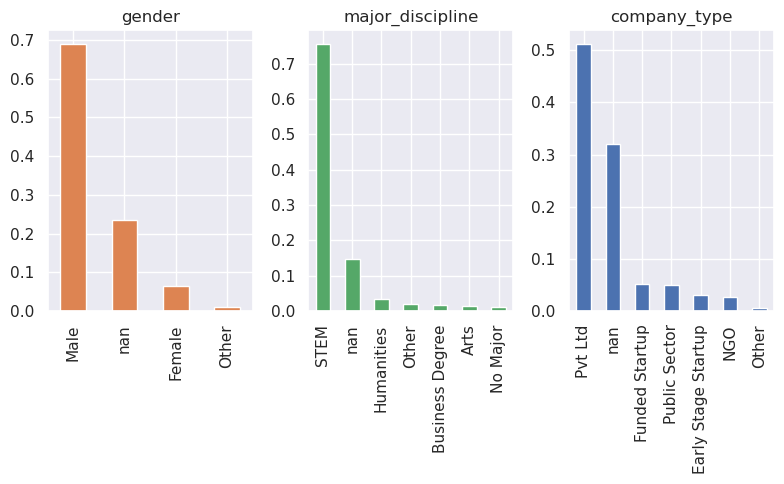

In [34]:
plt.figure(1)
plt.subplot(131)
tr_c['gender'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(8,5), title='gender', color='C1');

plt.subplot(132)
tr_c['major_discipline'].value_counts(normalize=True, dropna=False).plot.bar(figsize=(8, 5), title='major_discipline', color='C2');

plt.subplot(133)
tr_c['company_type'].value_counts(normalize=True, dropna=False).plot.bar(title='company_type')

plt.tight_layout()

<span style="background-color:yellow; font-weight:bold">2. **Independent Variable (Numerical)-**</span>

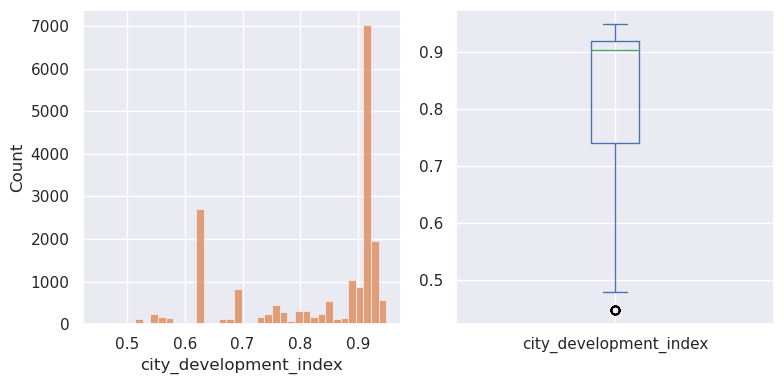

In [35]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

plt.figure(1) 
plt.subplot(121) 
sns.histplot(tr_c['city_development_index'], color='C1'); 

plt.subplot(122) 
tr_c['city_development_index'].plot.box(figsize=(8,4)) 

plt.tight_layout()

**Observations-**
* Most of the employees come from cities with higher development index - equal or over 0.9
* There is also a representative category of employees that come from cities with lower development index - between 0.6 and -0.7

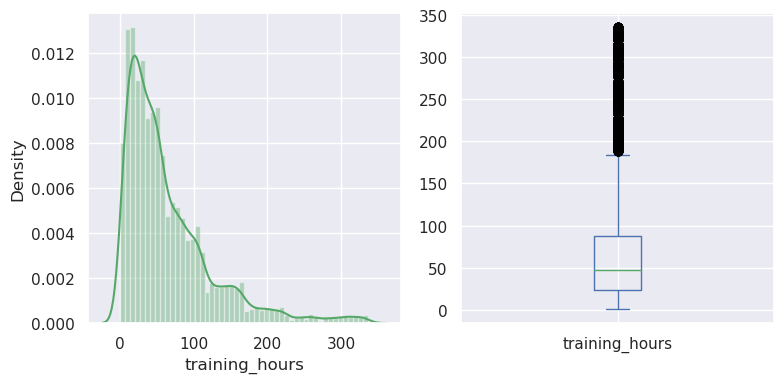

In [36]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(1) 
plt.subplot(121) 
sns.distplot(tr_c['training_hours'], color='C2'); 

plt.subplot(122) 
tr_c['training_hours'].plot.box(figsize=(8,4)) 

plt.tight_layout()

**Observations-**
* Most of the employees attended between 0-100 training hours

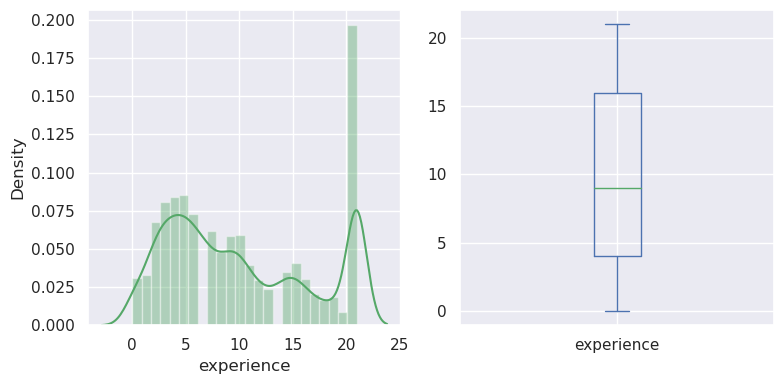

In [37]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(1) 
plt.subplot(121) 
sns.distplot(tr_c['experience'], color='C2'); 

plt.subplot(122) 
tr_c['experience'].plot.box(figsize=(8,4)) 

plt.tight_layout()

In [38]:
x=tr_c[tr_c.isna().sum(1)>3]
tr_c.drop(x.index, axis=0, inplace=True)
tr_c

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,74.5,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,74.5,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,29.5,Funded Startup,1.0,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,74.5,Pvt Ltd,4.0,44,0.0


**Observation-**
We have drop 878 rows of train dataset because these 878 rows contains maximum columns with null values.

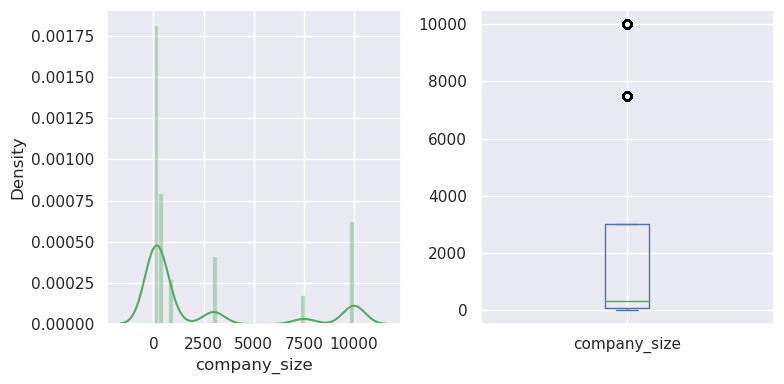

In [39]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(1) 
plt.subplot(121) 
sns.distplot(tr_c['company_size'], color='C2'); 

plt.subplot(122) 
tr_c['company_size'].plot.box(figsize=(8,4)) 

plt.tight_layout()

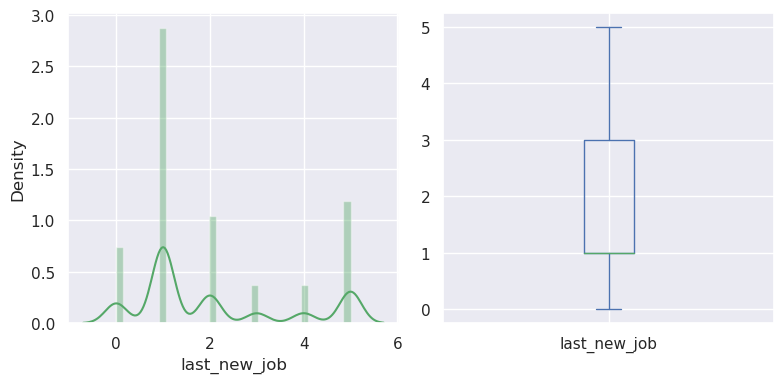

In [40]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(1) 
plt.subplot(121) 
sns.distplot(tr_c['last_new_job'], color='C2'); 

plt.subplot(122) 
tr_c['last_new_job'].plot.box(figsize=(8,4)) 

plt.tight_layout()

In [41]:
tr_c.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
count,18280,14456,18280,18076,18133,16216,12990
unique,123,3,2,3,5,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
freq,4225,13043,13593,13420,11490,14373,9800


**Observations-**

* city_development_index has a minimum value of 0.448 and a maximum of 0.949. The average/mean is 0.829, the median is 0.903 and standard deviation 0.123.
* training hours has a minimum value of 1 and maximum of 336. The mean is 65.37, the median is 47 and standard deviation is 60.06.


<span style="background-color:pink; font-weight:bold">1. **(For test)-**</span>

In [42]:
ts_c['company_size'].replace('10000+','10000',inplace=True)
ts_c['company_size'].replace('10/49','10-49',inplace=True)
ts_c['company_size'].replace('<10','0-10',inplace=True)
x1=['50-99','100-500', '10-49', '1000-4999', '0-10', '500-999', '5000-9999' ]
m=[]
for i in x1:
    j=i.split('-')
    l=[]
    for s in range(int(j[0]), int(j[1])+1):
        l.append(s)
    m.append(np.mean(l))

In [43]:
ts_c['company_size'].replace(x1, m, inplace=True)
ts_c['company_size']=ts_c['company_size'].astype('float')

In [44]:
ts_c['experience'].replace('>20', 21, inplace=True)
ts_c['experience'].replace('<1', 0, inplace=True)
ts_c['experience']=ts_c['experience'].astype('float')

In [45]:
ts_c['last_new_job'].replace('>4', '5', inplace=True)
ts_c['last_new_job'].replace('never', '0', inplace=True)
ts_c['last_new_job']=ts_c['last_new_job'].astype('float')

In [46]:
ts_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   float64
 9   company_size            1507 non-null   float64
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   float64
 12  training_hours          2129 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 216.4+ KB


In [47]:
x=ts_c[ts_c.isna().sum(1)>3]
ts_c.drop(x.index, axis=0, inplace=True)
ts_c

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,5.0,NaN,1.0,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,NaN,Pvt Ltd,1.0,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,0.0,NaN,Pvt Ltd,0.0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,29.5,Pvt Ltd,1.0,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000.0,Pvt Ltd,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,NaN,Public Sector,4.0,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,NaN,NaN,2.0,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3.0,NaN,Pvt Ltd,0.0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7.0,300.0,Public Sector,1.0,84


**Observation-**
We have drop 85 rows of test dataset because these 85 rows contains maximum null values.

# <span style="background-color:pink; font-weight:bold">Exploratory Data Analysis (Bivariate Analysis)-</span>

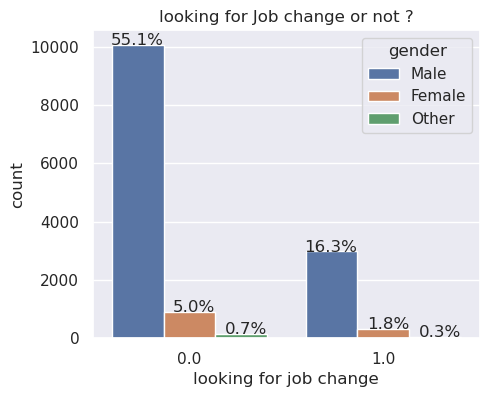

In [48]:
#0 – Not looking for job change, 1 – Looking for a job change
sns.set(rc={"figure.figsize":(5, 4)})
ax=sns.countplot(x='target', data=tr_c, hue='gender');
total=float(len(tr_c))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()

**Observation:**

* Around 25% people are lookging for a job change
* Out of which, 15.7% people are male
* Around 80% people are currently not looking for job change

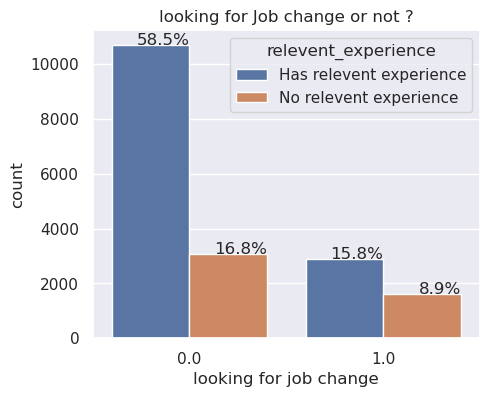

In [49]:
#0 – Not looking for job change, 1 – Looking for a job change
sns.set(rc={"figure.figsize":(5, 4)})
ax=sns.countplot(x='target', data=tr_c, hue='relevent_experience');
total=float(len(tr_c))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')

plt.show()

**Observation:**

* Out of those who looks for job change, 15.5 % have relevent experience.

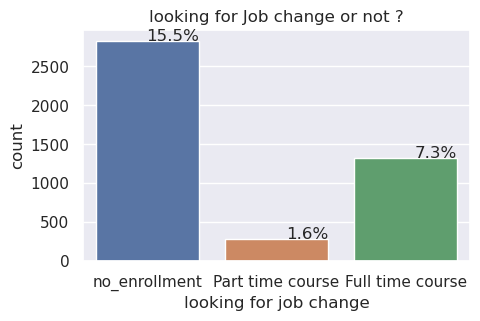

In [50]:
sns.set(rc={"figure.figsize":(5, 3)})
ax=sns.countplot(x='enrolled_university', data=tr_c[tr_c['target']==1]);
total=float(len(tr_c))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()

**Observation:**

* Around 37% of people who are leaving the job are due to higher studies. Around 61% of the people havent enrolled in any educational courses. So, they might be leaving the job due to other reasons such as salary issues, job satisfaction, etc

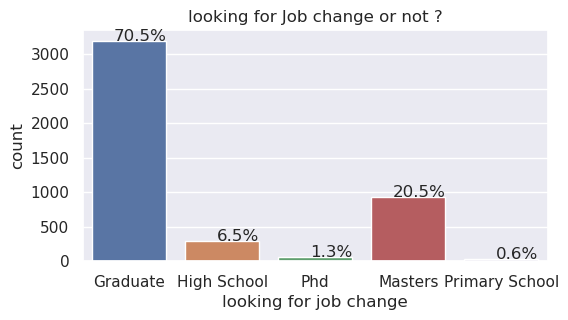

In [51]:
sns.set(rc={"figure.figsize":(6, 3)})
ax=sns.countplot(x='education_level', data=tr_c[tr_c['target']==1]);
total=float(len(tr_c[tr_c['target']==1]))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()

**Observation:**
* Graduates are more likely to look for a job change.

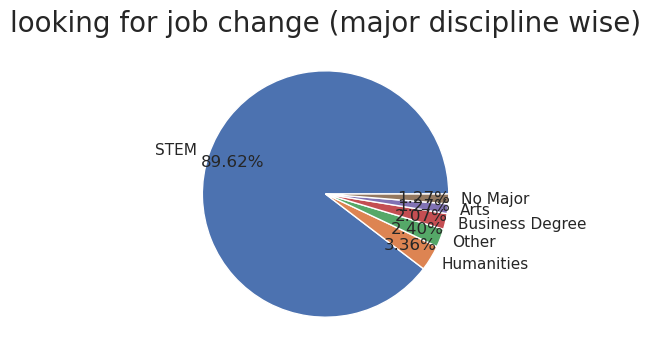

In [52]:
major_discipline = tr_c[tr_c['target'] == 1]['major_discipline']
values = major_discipline.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(4,4))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('looking for job change (major discipline wise)', fontsize=20);

**Observation:**

* Around 80% of STEM degree holders are looking fot job change. So, It might be possible that they are more likely to look for job changes

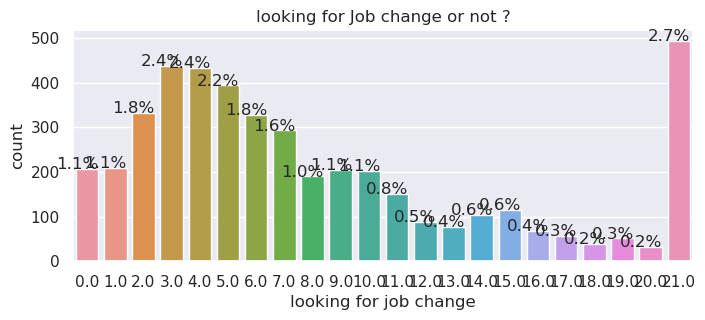

In [53]:
sns.set(rc={"figure.figsize":(8, 3)})
ax=sns.countplot(x='experience', data=tr_c[tr_c['target']==1]);
total=float(len(tr_c))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()

**Observation**

* People with experience 2,3,4,5 and >20 are more likely to look for job change

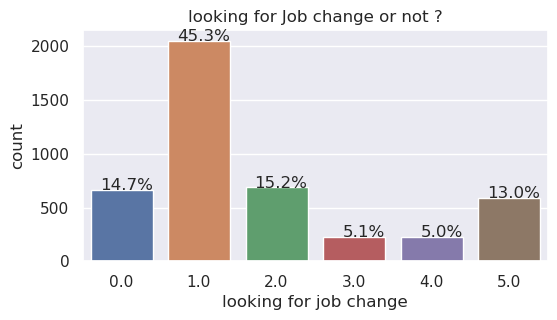

In [54]:
sns.set(rc={"figure.figsize":(6, 3)})
ax=sns.countplot(x='last_new_job', data=tr_c[tr_c['target']==1]);
total=float(len(tr_c[tr_c['target']==1]))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()
    y=i.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()

**Observation:**

* Around 44.5 % of the people who are looking out for job change have only one year of difference between their current job and previus job. One of the possible reasons could be, they might not like the work culture of the company

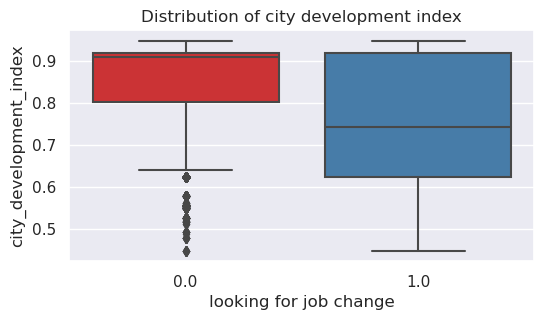

In [55]:
sns.boxplot(x="target",y="city_development_index",data=tr_c,palette="Set1")
plt.title("Distribution of city development index")
plt.xlabel("looking for job change");

**Observation**

* Average city development index for people who are looking for job change is less. So, people from city which has higher development index are less likely to look for job change

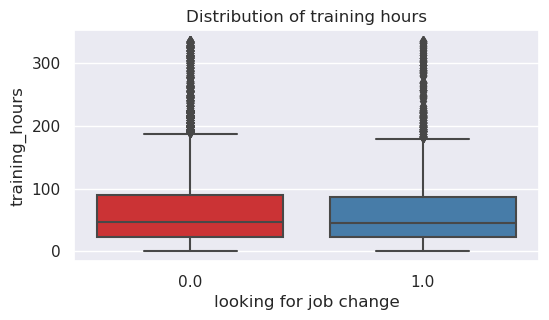

In [56]:
sns.boxplot(x="target",y="training_hours",data=tr_c,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change");

**Observation:**

* Average training hours completed is almost same for people who are looking for job and not. It means training hours doesnt have impact here

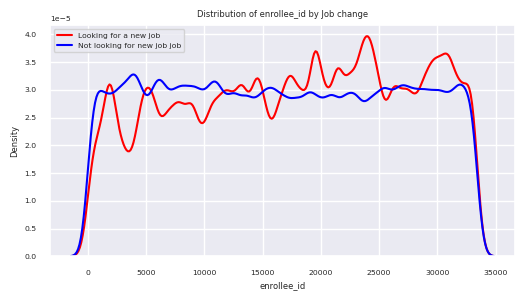

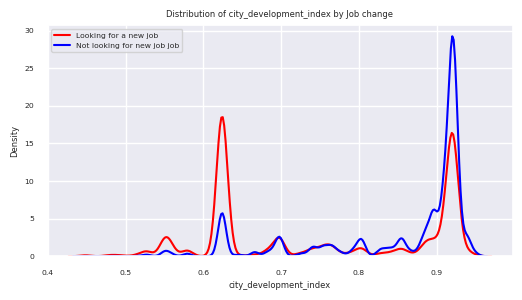

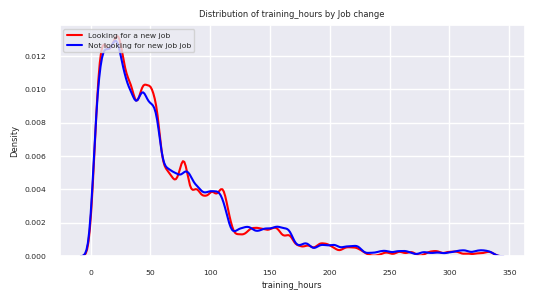

In [57]:
tr_c.columns

for i in tr_c[['enrollee_id', 'city_development_index', 'training_hours']]:
    sns.set(font_scale=0.5)
    plt.figure(figsize=[6,3])
    ax = sns.kdeplot(tr_c[i][(tr_c["target"] == 1) ],color="red", bw = .05, shade=False, gridsize=300)
    ax = sns.kdeplot(tr_c[i][(tr_c["target"] == 0) ],color="blue", bw=.05, shade=False, gridsize=300)
    ax.legend(["Looking for a new job","Not looking for new job job"],loc='upper left')
    ax.set_ylabel('Density')
    ax.set_xlabel(i)
    ax.set_title("Distribution of "+ i +" by Job change");

**Observation-**
* According to the EDA analysis of numeric columns, enrolee_id has no effect on the target feature
* city_development index did influence the target: job candidates living in cities with lower development index look for a new job 3 times more frequently than those who prefer to stay in the company. Regarding the cities with high development index, the number of employees planning to leave the job is around 2 times lower than those who intended to stay. 
* I could not observe a clear dependence of those who got trained less or more on their tendency to leave or stay in the company.

In [58]:
#checking independency each and every variable
tr_c.corr()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
enrollee_id,1.000000,-0.037919,-0.036193,0.023121,-0.031289,-0.001312,0.047900
city_development_index,-0.037919,1.000000,0.337115,0.062753,0.188541,0.003754,-0.340700
experience,-0.036193,0.337115,1.000000,0.077101,0.466977,0.001127,-0.181878
company_size,0.023121,0.062753,0.077101,1.000000,0.076219,-0.011265,0.007035
last_new_job,-0.031289,0.188541,0.466977,0.076219,1.000000,-0.006709,-0.088785
training_hours,-0.001312,0.003754,0.001127,-0.011265,-0.006709,1.000000,-0.021978
target,0.047900,-0.340700,-0.181878,0.007035,-0.088785,-0.021978,1.000000


In [59]:
tr_c['training_hours_bins'] = pd.cut(tr_c['training_hours'],bins=6)
tr_c.groupby('training_hours_bins').target.agg(['count','mean'])

,count,mean
training_hours_bins,,
"(0.665, 56.833]",10774,0.253109
"(56.833, 112.667]",4660,0.245494
"(112.667, 168.5]",1706,0.236811
"(168.5, 224.333]",633,0.227488
"(224.333, 280.167]",235,0.174468
"(280.167, 336.0]",272,0.213235


In [60]:
tr_c.drop('training_hours_bins', axis=1, inplace=True)

**Observations:**

* 11.283 of the employees attended between 0-56.83 training hours. 25.56% of these employees are looking for a job change.
* 4891 of the employees attended betwwen 56.84 - 112.67 training hours and 24.58% of them are looking for a job change.
* 1784 of the employees attended between 112.68 - 168.5 training hours and 24.16% of them are looking for a job change.
* at a glance, no matter the number of bins or training hours, in each bin we have 21%-25% of the employees looking for a job change.

In [61]:
tr_c['city_development_index_bins'] = pd.cut(tr_c['city_development_index'],bins=3)
tr_c.groupby('city_development_index_bins').target.agg(['count','mean'])

,count,mean
city_development_index_bins,,
"(0.447, 0.615]",674,0.571217
"(0.615, 0.782]",4706,0.440714
"(0.782, 0.949]",12900,0.159612


**Observations:**

* most of the employees come from cities with higher development index (0.782, 0.949], but only 15.99% of them are looking for a job change.
* 57.93% of the employees that come from cities with lower development index (0.447, 0.615] are looking for a job change.
* 43.96% of the employees coming from cities with medium development index (0.615, 0.782] are looking for a job change.

In [62]:
tr_c.drop('city_development_index_bins', axis=1, inplace=True)

In [63]:
tr_c.groupby('gender').target.agg(['count','mean'])

,count,mean
gender,,
Female,1231,0.264825
Male,13043,0.228245
Other,182,0.263736


**Observations:**

* the share of people that want to change the job is similar in all gender categories, but ~26% from 'Female' and 'Other' are looking for a job change, while 22.78% from 'Male' are looking for a job change.

In [64]:
tr_c.groupby('education_level').target.agg(['count','mean'])

,count,mean
education_level,,
Graduate,11490,0.277198
High School,1669,0.174955
Masters,4332,0.213527
Phd,411,0.138686
Primary School,231,0.121212


**Observations:**

* 27.98% of the Graduates are looking for a job change, followed by Master's degrees with 21.44% and High school graduates with 19.53%.
* Phd and Primary School graduates are less likely to look for a job change with probability of 13-14%.

In [65]:
tr_c.groupby('enrolled_university').target.agg(['count','mean'])

,count,mean
enrolled_university,,
Full time course,3493,0.380189
Part time course,1163,0.246776
no_enrollment,13420,0.210581


**Observations:**

* 38.08% of the employees that enrolled to the full time course are looking for a job change
* 25.21% of the employees that enrolled in the part time course are looking for a job change
* 21.14% of the employees that didn't enroll the course are still looking for a job change

In [66]:
tr_c.groupby('experience').target.agg(['count','mean'])

,count,mean
experience,,
0.0,431,0.477958
1.0,475,0.442105
2.0,983,0.338759
3.0,1227,0.356968
4.0,1313,0.330541
5.0,1357,0.290346
6.0,1162,0.282272
7.0,997,0.293882
8.0,782,0.242967


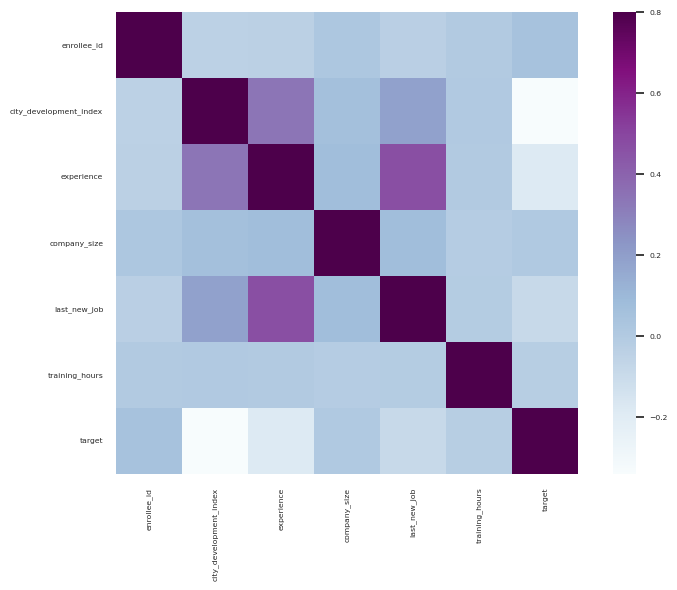

In [67]:
# display(tr_c[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_type','target']].groupby(['gender','education_level','experience']).agg(["max",'mean',"min"]).style.background_gradient(cmap="inferno"))
matrix = tr_c.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

**Observation-**
* We see that the mostly numeric values are not correlated to each other.
* We see that the most correlated variables are (last_new_job - Experience) and (Experience - City_development_index). 
* Last_new_job is also correlated with City-development_index.

# <span style="background-color:pink; font-weight:bold">Missing value and outlier treatment-</span>
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.
We can consider these methods to fill the missing values:
* **For numerical variables** : imputation using mean or median.
* **For categorical variables** : imputation using mode.

In [68]:
tr_c.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3824
relevent_experience          0
enrolled_university        204
education_level            147
major_discipline          2064
experience                  33
company_size              5095
company_type              5290
last_new_job               228
training_hours               0
target                       0
dtype: int64

**Observation-**
* There are missing values in gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type and last_new_job features.

<span style="background-color:yellow; font-weight:bold">**For categorical variables :**</span>

<span style="background-color:pink; font-weight:bold">**For train:**</span>

In [69]:
#imputation using mode-
tr_c['gender'].fillna(tr_c['gender'].mode()[0], inplace=True)
tr_c['enrolled_university'].fillna(tr_c['enrolled_university'].mode()[0], inplace=True)
tr_c['education_level'].fillna(tr_c['education_level'].mode()[0], inplace=True)
tr_c['major_discipline'].fillna(tr_c['major_discipline'].mode()[0], inplace=True)
tr_c['experience'].fillna(tr_c['experience'].median(), inplace=True)
tr_c['company_size'].fillna(tr_c['company_size'].median(), inplace=True)
tr_c['company_type'].fillna(tr_c['company_type'].mode()[0], inplace=True)
tr_c['last_new_job'].fillna(tr_c['last_new_job'].median(), inplace=True)

In [70]:
#checking missing values-
tr_c.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

<span style="background-color:pink; font-weight:bold">**For  test data:**</span>

In [71]:
ts_c['gender'].fillna(ts_c['gender'].mode()[0], inplace=True)
ts_c['enrolled_university'].fillna(ts_c['enrolled_university'].mode()[0], inplace=True)
ts_c['education_level'].fillna(ts_c['education_level'].mode()[0], inplace=True)
ts_c['major_discipline'].fillna(ts_c['major_discipline'].mode()[0], inplace=True)
ts_c['experience'].fillna(ts_c['experience'].median(), inplace=True)
ts_c['company_size'].fillna(ts_c['company_size'].median(), inplace=True)
ts_c['company_type'].fillna(ts_c['company_type'].mode()[0], inplace=True)
ts_c['last_new_job'].fillna(ts_c['last_new_job'].median(), inplace=True)

In [72]:
ts_c.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# <span style="background-color:pink; font-weight:bold">Outlier Treatment-</span>
As we saw earlier in univariate analysis, training_hours contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [73]:
tr_c['training_hours'].info()

<class 'pandas.core.series.Series'>
Int64Index: 18280 entries, 0 to 19156
Series name: training_hours
Non-Null Count  Dtype
--------------  -----
18280 non-null  int64
dtypes: int64(1)
memory usage: 285.6 KB


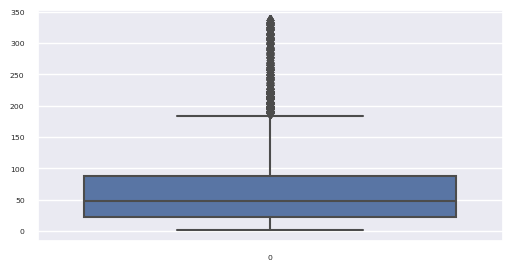

In [74]:
sns.boxplot(tr_c['training_hours']); 

The interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. It represents the middle 50% of data values and is an important value that gives a more accurate perspective of data spread and statistical variances1.
IQR can be used to identify outliers in a data set

In [75]:
IQR= tr_c['training_hours'].quantile(0.75) - tr_c['training_hours'].quantile(0.25)
lower_bridge= tr_c['training_hours'].quantile(0.25)-(IQR*1.5)
upper_bridge= tr_c['training_hours'].quantile(0.75)+(IQR*1.5)
tr_c.loc[tr_c['training_hours']>upper_bridge,'training_hours'] = upper_bridge

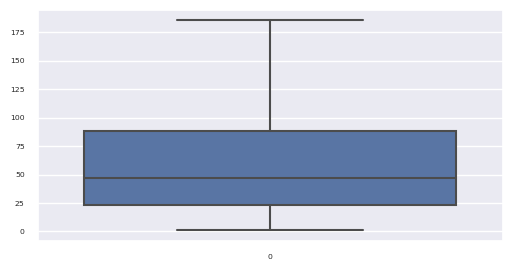

In [76]:
sns.boxplot(tr_c['training_hours']);
# ts_c['training_hours_log'] = np.log(ts_c['training_hours'])

<span style="background-color:yellow; font-weight:bold">**Label encoding for categorical data-**</span>

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [77]:
#for train data-
le=LabelEncoder()
ordinal_cols=[ 'enrolled_university', 'education_level', 'city', 'gender', 'relevent_experience', 'major_discipline', 'company_type']
for column in ordinal_cols:
    tr_c[column]=le.fit_transform(tr_c[column])

In [78]:
#for test data-
le=LabelEncoder()
ordinal_cols=[  'enrolled_university', 'education_level', 'city', 'gender', 'relevent_experience', 'major_discipline', 'company_type']
for column in ordinal_cols:
    ts_c[column]=le.fit_transform(ts_c[column])

# <span style="background-color:pink; font-weight:bold">Evaluation Metrics for classification problems-</span>
The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions.

Lets drop the enrollee_id variable as it do not have any effect on the target.

In [79]:
tr_c=tr_c.drop('enrollee_id',axis=1) 
ts_c=ts_c.drop('enrollee_id',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [80]:
X_tr=tr_c.drop(columns=["target"], axis=1)
Y_tr=tr_c["target"]

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

In [81]:
X_tr=pd.get_dummies(X_tr) 

In [82]:
Y_tr.value_counts()

0.0    13762
1.0     4518
Name: target, dtype: int64

# <span style="background-color:pink; font-weight:bold">**Handling Imbalance data**</span>
Imbalanced data refers to datasets where the distribution of class labels is not equal, with one class having a significantly higher number of observations than the other. This can be a problem for machine learning algorithms, as they can be biased towards the majority class and perform poorly on the minority class. 

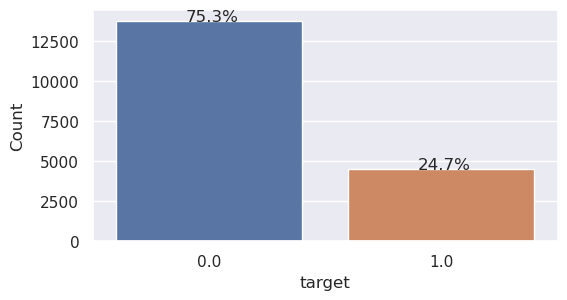

In [83]:
sns.set(rc={"figure.figsize":(6, 3)})
ax=sns.countplot(x='target', data=tr_c);
plt.xlabel("target")
plt.ylabel("Count")
total=len(tr_c)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_height()+10
    ax.annotate(percentage, (x,y), size=12)
plt.show()

**Synthetic minority oversampling technique(SMOTE)** is a type of oversampling technique that involves creating synthetic examples of the minority class by interpolating between existing minority class examples.

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy ='minority', random_state=10)
X_tr,Y_tr=smote.fit_resample(X_tr,Y_tr)

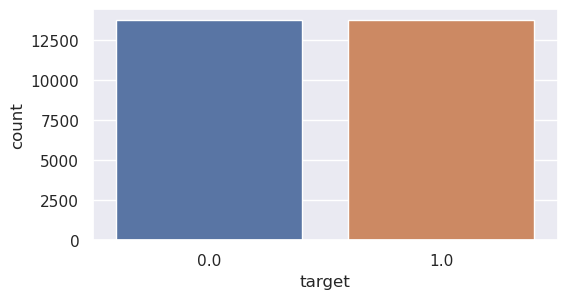

In [85]:
sns.countplot(x=Y_tr);

In [86]:
Y_tr.value_counts()

1.0    13762
0.0    13762
Name: target, dtype: int64

**Observation-**
* Before handling imbalance data we have our target varible distributed in 75.3%-24.7%.
* After balancing data we have our target variable distributed in 50%-50%.

<span style="background-color:yellow; font-weight:bold">**Train_Test_Split-**</span>

We will use the train_test_split function from sklearn to divide our train dataset. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_tr, Y_tr,test_size=0.25,random_state=42, stratify=Y_tr)
print(y_train.value_counts(), y_test.value_counts())

1.0    10322
0.0    10321
Name: target, dtype: int64 0.0    3441
1.0    3440
Name: target, dtype: int64


The dataset has been divided into training and test part. Let us fit different models.

In [88]:
svcclass = SVC()
dtclass = DecisionTreeClassifier()
knnclass = KNeighborsClassifier(5)
rfclass = RandomForestClassifier(n_estimators = 100)

In [89]:
svcclass.fit(X_train,y_train)
dtclass.fit(X_train,y_train)
knnclass.fit(X_train,y_train)
rfclass.fit(X_train,y_train)

RandomForestClassifier()

Let’s predict the target for test and calculate its accuracy.

In [90]:
svc_pred = svcclass.predict(X_test)
dtclass_pred = dtclass.predict(X_test)
knnclass_pred = knnclass.predict(X_test)
rfclass_pred = rfclass.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
print('SVC-', svcclass.score(X_train, y_train), accuracy_score(y_test, svc_pred))
print('dt-', dtclass.score(X_train, y_train), accuracy_score(y_test, dtclass_pred))
print('knn-', knnclass.score(X_train, y_train), accuracy_score(y_test, knnclass_pred))
print('rf-', rfclass.score(X_train, y_train), accuracy_score(y_test, rfclass_pred))

SVC- 0.5894492079639587 0.5874146199680279
dt- 0.9985467228600494 0.7686382793198663
knn- 0.8323887031923655 0.7445138787966865
rf- 0.9985467228600494 0.8327278011916872


In [92]:
data={' ':['train', 'test'], 'SVC':[svcclass.score(X_train, y_train), accuracy_score(y_test, svc_pred)], 'DT':[dtclass.score(X_train, y_train), accuracy_score(y_test, dtclass_pred)], 'KNN':[knnclass.score(X_train, y_train), accuracy_score(y_test, knnclass_pred)], 'RF':[rfclass.score(X_train, y_train), accuracy_score(y_test, rfclass_pred)]}
df=pd.DataFrame(data)
df.set_index(' ', inplace=True)
df

,SVC,DT,KNN,RF
,,,,
train,0.589449,0.998547,0.832389,0.998547
test,0.587415,0.768638,0.744514,0.832728




We will try to check the accuracy of different models by StratifiedKFold. 

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

Stratified KFold is a cross-validation technique for classification problems. It divides the dataset into k folds, but ensures that each fold has the same proportion of the target classes. This way, the mean response value or the class imbalance is approximately equal in all the folds. Stratified KFold can be used with an API that allows specifying the number of folds, the shuffling option, and the random state.

# <span style="background-color:pink; font-weight:bold">Decision tree-</span>

In [94]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_tr,Y_tr):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X_tr.loc[train_index],X_tr.loc[test_index]     
    ytr,yvl = Y_tr[train_index],Y_tr[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)   
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)     
    i+=1
pred_test = model.predict(X_test)


1 of kfold 5
accuracy_score 0.7696639418710264

2 of kfold 5
accuracy_score 0.7671207992733878

3 of kfold 5
accuracy_score 0.774205267938238

4 of kfold 5
accuracy_score 0.7767484105358765

5 of kfold 5
accuracy_score 0.7747093023255814


# <span style="background-color:pink; font-weight:bold">SVM-</span>

In [95]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_tr,Y_tr):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X_tr.loc[train_index],X_tr.loc[test_index]     
    ytr,yvl = Y_tr[train_index],Y_tr[test_index]         
    model = SVC(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
pred_test = model.predict(X_test)


1 of kfold 5
accuracy_score 0.545322434150772

2 of kfold 5
accuracy_score 0.589827429609446

3 of kfold 5
accuracy_score 0.5734786557674841

4 of kfold 5
accuracy_score 0.5941871026339691

5 of kfold 5
accuracy_score 0.588844476744186


# <span style="background-color:pink; font-weight:bold">RandomForestClassifier-</span>

In [96]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_tr,Y_tr):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X_tr.loc[train_index],X_tr.loc[test_index]     
    ytr,yvl = Y_tr[train_index],Y_tr[test_index]         
    model = RandomForestClassifier(n_estimators = 100)    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
pred_test = model.predict(X_test)


1 of kfold 5
accuracy_score 0.8294277929155314

2 of kfold 5
accuracy_score 0.8346957311534968

3 of kfold 5
accuracy_score 0.8390554041780199

4 of kfold 5
accuracy_score 0.8341507720254314

5 of kfold 5
accuracy_score 0.8353924418604651


# <span style="background-color:pink; font-weight:bold">KNeighborsClassifier-</span>

In [97]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_tr,Y_tr):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X_tr.loc[train_index],X_tr.loc[test_index]     
    ytr,yvl = Y_tr[train_index],Y_tr[test_index]         
    model = KNeighborsClassifier(5)    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
pred_test = model.predict(X_test)


1 of kfold 5
accuracy_score 0.7584014532243415

2 of kfold 5
accuracy_score 0.7540417801998184

3 of kfold 5
accuracy_score 0.7556766575840145

4 of kfold 5
accuracy_score 0.7562216167120799

5 of kfold 5
accuracy_score 0.7421875


**Observation-**
* We concluded that RandomForestClassifier is best model with highest accuracy score.

We will try to improve the accuracy by tuning the hyperparameters for these models. 

We will use random search cv and grid search cv to get the optimized values of hyper parameters. And also compare both accuracy.

# <span style="background-color:pink; font-weight:bold">Hyperparameter tuning (Random Search CV)-</span>
# KNN-

In [98]:
model=KNeighborsClassifier()
param_dist={'metric':['euclidean', 'minkowski', 'manhattan'],
           'n_neighbors':range(1,11)}

In [99]:
random_search=RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'minkowski',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 11)})

In [100]:
print(random_search.best_estimator_)
print(random_search.best_score_)

KNeighborsClassifier(n_neighbors=1)
0.7875788054242914


In [101]:
y_pred_R=random_search.predict(X_test)

In [102]:
print('train_accuracy=', random_search.score(X_train, y_train),
'test_accuracy=', accuracy_score(y_test,y_pred_R))

train_accuracy= 0.9984982802887177 test_accuracy= 0.7961052172649324


# SVM-

In [103]:
# model_svm=SVC()
# param={'C':range(1, 11),
#       'kernel':['linear','poly', 'rbf', 'sigmoid']}

In [104]:
# random_model_cv=RandomizedSearchCV(model_svm, param_distributions=param, cv=5)
# random_model_cv.fit(X_train, y_train)

In [105]:
# print(random_model_cv.best_estimator_,
#      random_model_cv.best_score_)

In [106]:
# y_pred_R=random_model_cv.predict(X_test)

In [107]:
# print('train_score=', random_model_cv.score(X_train, y_train),
#      'test_score=', accuracy_score(y_test, y_pred_R))

# Decision Tree-

In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
param_dt = {"max_depth": range(3,6),
              "max_features": range(1,11),
              "min_samples_split": range(2,11),
              "criterion": ["gini", "entropy"]}

In [110]:
random_search_dt=RandomizedSearchCV(dt, param_distributions=param_dt, cv=5)
random_search_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 6),
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [111]:
print(random_search_dt.best_estimator_,
     random_search_dt.best_score_)

DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_split=5) 0.7274135158577728


In [112]:
y_pred_dt=random_search_dt.predict(X_test)

In [113]:
print('train_score=', random_search_dt.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_dt))

train_score= 0.7226178365547643 test_score= 0.7155936637116698


# <span style="background-color:pink; font-weight:bold">Hyperparameter tuning (Grid Search CV)-</span>
# KNN-

In [114]:
Grid_search=GridSearchCV(model, param_grid=param_dist, cv=5)
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': range(1, 11)})

In [115]:
Grid_search.best_score_, Grid_search.best_estimator_

(0.8040492799089819, KNeighborsClassifier(metric='manhattan', n_neighbors=1))

In [116]:
y_pred_G=Grid_search.predict(X_test)

In [117]:
print('train_accuracy=',Grid_search.score(X_train, y_train),
     'test_accuracy=', accuracy_score(y_pred_G, y_test))

train_accuracy= 0.9984982802887177 test_accuracy= 0.8128179043743642


# SVM-

In [118]:
# Grid_search_CV=GridSearchCV(model_svm, param_grid=param, cv=5)
# Grid_search_CV.fit(X_train, y_train)

In [119]:
# print(Grid_search_CV.best_estimator_,
#      Grid_search_CV.best_score_)

In [120]:
# y_pred_G=Grid_search_CV.predict(X_test)

In [121]:
# print('train_score=', Grid_search_CV.score(X_train, y_train),
#      'test_score=',accuracy_score(y_test, y_pred_G))

# Decision Tree-

In [122]:
grid_search_dt=GridSearchCV(dt, param_grid=param_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 6), 'max_features': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [123]:
print(grid_search_dt.best_estimator_,
     grid_search_dt.best_score_)

DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_split=6) 0.7390885699748987


In [124]:
y_pred_dtG=grid_search_dt.predict(X_test)

In [125]:
print('train_score=', grid_search_dt.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_dtG))

train_score= 0.7321610231071065 test_score= 0.7304170905391658


In [126]:
data1={' ':['KNN', 'DT'],'Random_Train':[random_search.score(X_train, y_train), random_search_dt.score(X_train, y_train)], 'Randon_Test':[accuracy_score(y_test, y_pred_R), accuracy_score(y_test, y_pred_dt)], 'Grid_Train':[Grid_search.score(X_train, y_train), grid_search_dt.score(X_train, y_train)], 'Grid_Test':[accuracy_score(y_test, y_pred_G),  accuracy_score(y_test, y_pred_dtG)]}

In [127]:
df1=pd.DataFrame(data1)
df1.set_index(' ', inplace=True)
df1

,Random_Train,Randon_Test,Grid_Train,Grid_Test
,,,,
KNN,0.998498,0.796105,0.998498,0.812818
DT,0.722618,0.715594,0.732161,0.730417


**Observation-**
* We concluded DT works better than KNN with best accuracy by using RandomSearchCV (0.7226, 0.721404) and GridSearchCV(0.7278, 0.7291).


# <span style="background-color:pink; font-weight:bold">Feature selection-</span>
 Feature selection is the process by which a subset of relevant features, or variables, are selected from a larger data set for constructing models. Here we have impliment both SequentialFeatureSelectior and SelectKBest to compare both features.

<span style="background-color:yellow; font-weight:bold">**SequentialFeatureSelector-**</span>

Sequential feature selection algorithms are basically part of the wrapper methods where it adds and removes features from the dataset sequentially. Sometimes it evaluates each feature separately and selects M features from N features on the basis of individual scores; this method is called naive sequential feature selection.

In [128]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(dtclass, n_features_to_select=11)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=11)

In [129]:
sfs.get_feature_names_out()

array(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'company_size', 'company_type', 'last_new_job', 'training_hours'],
      dtype=object)

<span style="background-color:yellow; font-weight:bold">**SelectKBest-**</span>

SelectKBest uses statistical tests like chi-squared test, ANOVA F-test, or mutual information score to score and rank the features based on their relationship with the output variable. Then, it selects the K features with the highest scores to be included in the final feature subset.

In [130]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=8).fit(X_tr, Y_tr)
X_new.get_feature_names_out()

array(['city', 'city_development_index', 'enrolled_university',
       'education_level', 'experience', 'company_size', 'last_new_job',
       'training_hours'], dtype=object)

# <span style="background-color:pink; font-weight:bold">Feature importance-</span>
Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable. It is useful for machine learning tasks because it allows practitioners to understand which features in a dataset are contributing most to the final prediction, and which features are less important.

<span style="background-color:yellow; font-weight:bold">**Random forest classifier-**</span>


In [131]:
rfclass.feature_importances_

array([0.09736619, 0.18183959, 0.01564792, 0.01777318, 0.05535827,
       0.0489257 , 0.02102248, 0.14315664, 0.0877733 , 0.03356108,
       0.11282444, 0.1847512 ])

In [132]:
features_imp = pd.DataFrame({'importance': rfclass.feature_importances_}, index= X_tr.columns).sort_values('importance')

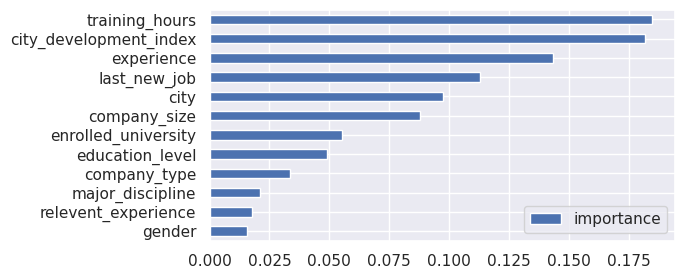

In [133]:
features_imp.plot.barh();

**Observation-**


# <span style="background-color:pink; font-weight:bold">Using Feature importance and hyperparameter tuning-</span>
Now, we have already get best_estimator_ by using hyperparameter tunnings and important features by using feature importance. So, lets check the accuracy of different models by appling best_estimators and importance features.

<span style="background-color:yellow; font-weight:bold">Decision tree-</span>

In [134]:
X_imp =X_tr[features_imp[features_imp['importance'] > 0.03].index]

In [135]:
X_ts,X_t,y_ts,y_t = train_test_split(X_imp,Y_tr,test_size = 0.3)

In [136]:
model_dt_imp = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=10)
model_dt_imp.fit(X_ts,y_ts)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=10)

In [137]:
p_t = model_dt_imp.predict(X_t)
dt_tt = model_dt_imp.score(X_ts,y_ts)
dt_ts = accuracy_score(y_t,p_t)
print(dt_tt)
print(dt_ts)

0.7395411605937922
0.7385565512230564


<span style="background-color:yellow; font-weight:bold">KNN-</span>

In [138]:
model_knn_imp = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
model_knn_imp.fit(X_ts,y_ts)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [139]:
p_t = model_knn_imp.predict(X_t)
knn_tt = model_knn_imp.score(X_ts,y_ts)
knn_ts = accuracy_score(y_t,p_t)
print(knn_tt)
print(knn_ts)

0.9965223710162981
0.798377331072899


<span style="background-color:yellow; font-weight:bold">Random Forest Classifier-</span>

In [140]:
model_rf_imp = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=10)
model_rf_imp.fit(X_ts,y_ts)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=10)

In [141]:
p_t = model_rf_imp.predict(X_t)
rf_tt = model_rf_imp.score(X_ts,y_ts)
rf_ts = accuracy_score(y_t,p_t)
print(rf_tt)
print(rf_ts)

0.7508564310183743
0.742673770888835


# <span style="background-color:pink; font-weight:bold">Bagging-</span>
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
Here, we use voting classifier-

<span style="background-color:yellow; font-weight:bold">Voting classifier-</span>

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [142]:
from sklearn.ensemble import VotingClassifier

In [143]:
vote_model=VotingClassifier(estimators=[('DT',model_dt_imp), ('KNN', model_knn_imp), ('RF', model_rf_imp)], voting='hard')
vote_model.fit(X_train,y_train)
pred_vote=vote_model.predict(X_test)
print(vote_model.score(X_train,y_train))
print(accuracy_score(y_test,pred_vote))

0.8078767620985322
0.7690742624618515


# <span style="background-color:pink; font-weight:bold">Boosting-</span>
Boosting is a machine learning technique that aims to improve the accuracy of models by combining multiple weak learners. It belongs to the family of ensemble methods, which leverage the strengths of multiple models to create a stronger, more accurate predictor

<span style="background-color:yellow; font-weight:bold">XGBOOST-</span>

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.

In [144]:
from xgboost import XGBClassifier

In [145]:
model_xg = XGBClassifier(n_estimators=50, max_depth=4) 
model_xg.fit(X_ts,y_ts)
pred_test=model_xg.predict(X_t)
xg_tr=model_xg.score(X_ts,y_ts) 
xg_ts=accuracy_score(y_t,pred_test)

In [146]:
data3={' ':['test', 'train'],'DT':[dt_ts, dt_tt], 'KNN':[knn_ts, knn_tt], 'RF':[rf_ts, rf_tt], 'Bagging':[accuracy_score(y_test,pred_vote),  vote_model.score(X_train,y_train)], 'Boosting':[xg_ts, xg_tr]}
df3=pd.DataFrame(data3)
df3.set_index(' ', inplace=True)
df3

,DT,KNN,RF,Bagging,Boosting
,,,,,
test,0.738557,0.798377,0.742674,0.769074,0.834827
train,0.739541,0.996522,0.750856,0.807877,0.849891


# <span style="background-color:pink; font-weight:bold">Confusion matrix-</span>
A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying mis-classifications, and improving predictive accuracy.

Here we concluded that Bagging and Boosting model works with good accuracy in compare to other models so, we apply confusion matrix in these two models.

<span style="background-color:yellow; font-weight:bold">For Voting classifier-</span>

In [147]:
confusion_matrix(y_test,pred_vote)

array([[2756,  685],
       [ 904, 2536]])

In [148]:
print(classification_report(y_test,pred_vote))

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.78      3441
         1.0       0.79      0.74      0.76      3440

    accuracy                           0.77      6881
   macro avg       0.77      0.77      0.77      6881
weighted avg       0.77      0.77      0.77      6881



<span style="background-color:yellow; font-weight:bold">For XGBOOST-</span>

In [149]:
confusion_matrix(y_t,pred_test)

array([[3518,  610],
       [ 754, 3376]])

In [150]:
print(classification_report(y_t,pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      4128
         1.0       0.85      0.82      0.83      4130

    accuracy                           0.83      8258
   macro avg       0.84      0.83      0.83      8258
weighted avg       0.84      0.83      0.83      8258



**Conclusion-**
* From above operation we concluded that in comparision to other models DT works more better.
* But after using hyperparametric tunning and feature importance in 5 models, we concluded that boosting model works more better than other models with best accuracy(train-0.833, test-0.847)
* XGBOOST works better than Random Forest.

# <span style="background-color:pink; font-weight:bold">Predicting Test Data-</span>

In [151]:
ts_c
train_predict=model_xg.predict(ts_c[X_imp.columns])

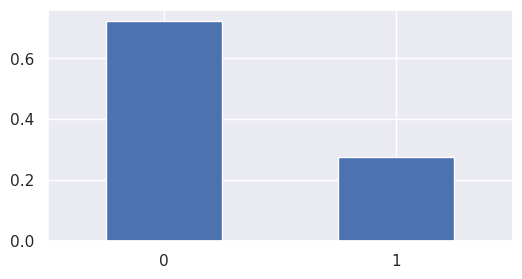

In [152]:
pd.Series(train_predict).value_counts(normalize=True).plot.bar()
plt.xticks(rotation=360);